In [1]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
y = np.arange(25)

In [3]:
y.shape = (5,5)

<matplotlib.colorbar.Colorbar instance at 0x1090bdbd8>

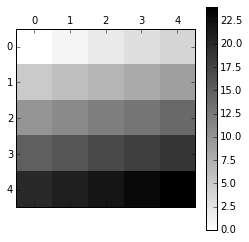

In [4]:
matshow(y,cmap=cm.gray_r)
colorbar()

In [5]:
y

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [6]:
y = np.zeros((5,5))

## Perfect negative autocorrelation

In [7]:
y = np.zeros((25,))
ids = range(0,25,2)
y[ids] = 1
y.shape = (5,5)

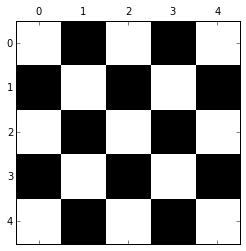

In [8]:
matshow(y,cmap=cm.gray)

In [9]:
y.shape = (25,)

## Join Counts

In [10]:
import pysal as ps
w = ps.lat2W(5,5)

$bb_i = \sum_j y_i w_{i,j} y_j = y_i \sum_j w_{i,j} y_j$ 

In [11]:
bbi = y * ps.lag_spatial(w,y)

In [12]:
bbi

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

$ww_i = \sum_j (1-y_i) w_{i,j} (1-y_j) = (1-y_i) \sum_j w_{i,j} (1-y_j)$

In [13]:
yc = 1 - y

In [14]:
wwi = yc * ps.lag_spatial(w,yc)

In [15]:
wwi

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

$bw_i = \sum_{j} w_{i,j} - bb_i - ww_i$

$2 bw = \sum_i bw_i = \sum_i ( \sum_j w_{i,j} - bb_i - ww_i ) = S_0 - bb - ww$

In [16]:
w.s0

80.0

In [17]:
bw = (w.s0 - bbi.sum() - wwi.sum())/2.

In [18]:
bw

40.0

In [19]:
jc = ps.Join_Counts(y, w)

In [20]:
jc.bw

40.0

In [21]:
jc.p_sim_bb

1.0

In [22]:
jc.p_sim_bw

0.001

In [23]:
from scipy.stats import gaussian_kde

In [24]:
density = gaussian_kde(jc.sim_bw)

In [25]:
xs = linspace(0,50,200)

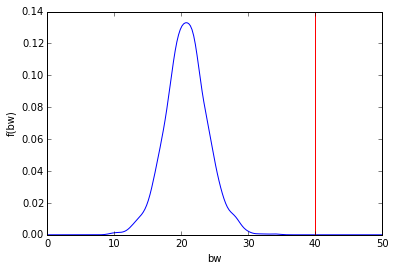

In [26]:
plot(xs, density(xs))
axvline(x=jc.bw, color='r')
xlabel('bw')
ylabel('f(bw)')

In [27]:
density = gaussian_kde(jc.sim_bb)

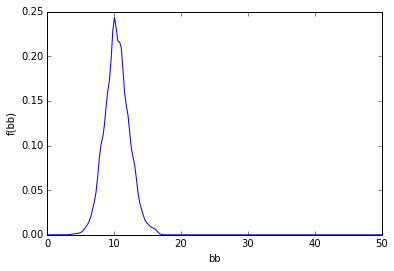

In [28]:
plot(xs, density(xs))
axvline(x=jc.bb, color='r')
xlabel('bb')
ylabel('f(bb)')

In [29]:
jc.bb

0.0

In [30]:
w.s0/2


40.0

## Random pattern

In [31]:
from scipy.stats import bernoulli

In [32]:
y = bernoulli.rvs(0.5, size=25)

In [33]:
y

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1])

In [34]:
jc_random = ps.Join_Counts(y,w)

In [35]:
y.shape = (5,5)

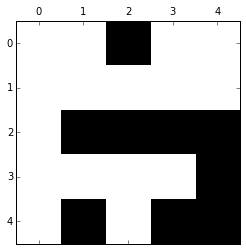

In [36]:
matshow(y,cmap=cm.gray_r)

In [37]:
jc_random.p_sim_bb

0.313

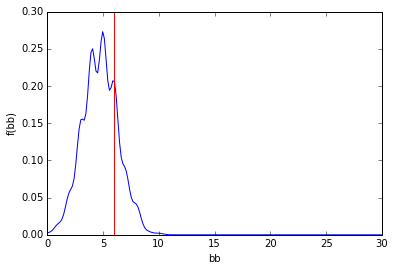

In [38]:
density = gaussian_kde(jc_random.sim_bb)
xs = linspace(0,30,200)
plot(xs, density(xs))
axvline(x=jc_random.bb, color='r')
xlabel('bb')
ylabel('f(bb)')

In [39]:
jc_random.p_sim_bw

0.82099999999999995

In [40]:
jc_random.ww

17.0

In [41]:
jc_random.bw

17.0

In [42]:
jc_random.bb

6.0

## Continuous Variable

In [43]:
y = np.arange(w.n)


<matplotlib.colorbar.Colorbar instance at 0x10bb618c0>

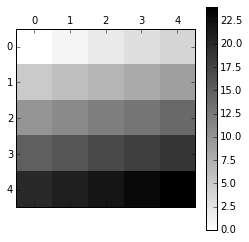

In [44]:
yc = y.copy()
yc.shape = (5,5)
matshow(yc,cmap=cm.gray_r)
colorbar()

##Moran's I

$$I = \frac{n}{S_0} \frac{\sum_i \sum_j z_i w_{i,j} z_j}{\sum_i z_iz_i}$$

In [45]:
mi = ps.Moran(y,w)

In [46]:
mi.I

0.83999999999999997

In [47]:
mi.EI

-0.041666666666666664

In [48]:
mi.p_norm

4.3976446928439827e-09

In [49]:
mi.p_sim

0.001

mi.sim

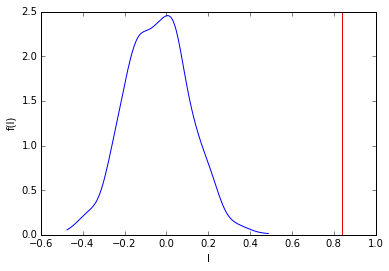

In [50]:
density = gaussian_kde(mi.sim)
xs = linspace(mi.sim.min(),mi.sim.max(),200)
plot(xs, density(xs))
axvline(x=mi.I, color='r')
xlabel('I')
ylabel('f(I)')

## Moran Scatter Plot

In [51]:
w.transform = "R"

In [52]:
wy = ps.lag_spatial(w, y)

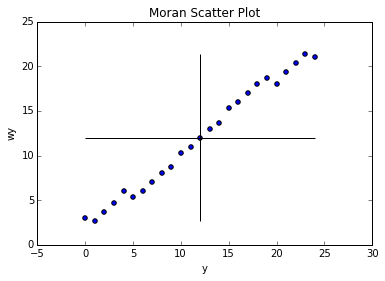

In [53]:
scatter(y,wy)
vlines(y.mean(),wy.min(),wy.max())
hlines(wy.mean(),y.min(),y.max())
xlabel('y')
ylabel('wy')
title('Moran Scatter Plot')

##Getis Ord $G$

In [54]:
g = ps.G(y,w)

In [55]:
g.p_sim

0.002

In [56]:
ps.G?